In [107]:
import pandas as pd
from prophet import Prophet
import time
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import time
import numpy as np
metric1 = pd.read_csv("metricbeat-230802-ai-broker-1.csv")
metric2 = pd.read_csv("metricbeat-230802-ai-broker-2.csv")
metric3 = pd.read_csv("metricbeat-230802-ai-broker-3.csv")
metric4 = pd.read_csv("metricbeat-230802-ai-broker-4.csv")
metric5 = pd.read_csv("metricbeat-230802-ai-broker-5.csv")

zipkin = pd.read_csv("zipkin-230801-all-broker.csv")



metric_lst = [metric1,metric2,metric3,metric4,metric5]
metric_merge = pd.merge(metric1,metric2, on='container_name')
metric_merge = pd.concat([metric1,metric2,metric3,metric4,metric5])
metric_merge.drop(['Unnamed: 0'], axis = 1, inplace = True)
metric_merge.drop(['new_index'], axis = 1, inplace = True)
zipkin.drop(['Unnamed: 0'], axis = 1, inplace = True)
zipkin.drop(['new_index'], axis = 1, inplace = True)
# print(metric_merge)

merged = pd.merge(metric_merge,zipkin,on=['timestamp_5seconds'])
# print("merged saving ")
# merged.to_csv("230808merged.csv")
# Select the relevant columns for anomaly detection




                        ds                                         ticker  \
0      2023-07-27 18:28:48   get /ndxpro/v1/aibroker/entities/iot/history   
1      2023-07-27 18:28:48           get /ndxpro/v1/aibroker/entities/iot   
2      2023-07-27 18:28:48   get /ndxpro/v1/aibroker/entities/iot/history   
3      2023-07-27 18:28:48           get /ndxpro/v1/aibroker/entities/iot   
4      2023-07-27 18:28:48               get /ndxpro/v1/aibroker/entities   
...                    ...                                            ...   
397770 2023-07-27 18:29:33  get /ndxpro/v1/aibroker/entities/iot/temporal   
397771 2023-07-27 18:29:33    get /ndxpro/v1/aibroker/entities/{entityid}   
397772 2023-07-27 18:29:33               get /ndxpro/v1/aibroker/entities   
397773 2023-07-27 18:29:33               get /ndxpro/v1/aibroker/entities   
397774 2023-07-27 18:29:33               get /ndxpro/v1/aibroker/entities   

               y  cpu_usage  duration   utility  
0       0.049273   0.0029

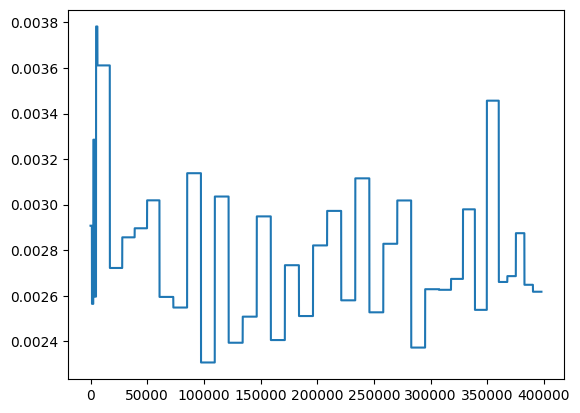

In [114]:

prophet_data = pd.DataFrame()
# prophet_data['ds'] = merged['timestamp_5seconds']
prophet_data['ds'] = pd.to_datetime(merged['zipkin_timestamp'])

prophet_data['ticker'] = merged['api_name'] 
# prophet_data['y'] = 
prophet_data['y'] = merged['cpu_usage']*merged['duration']
prophet_data['cpu_usage'] = merged['cpu_usage']
prophet_data['duration'] = merged['duration']



# print(prophet_data.info())
groups_by_api_name = prophet_data.groupby('ticker')
# print(groups_by_api_name.groups.keys())



ticker_list = []
for i in groups_by_api_name.groups.keys():
    # print(i)
    ticker_list.append(i)

# prophet_data y
prophet_data['utility'] = merged['cpu_usage'] * merged['duration']

# 날짜별
filtered_df = prophet_data.loc[(prophet_data['ds'] >= '2023-7-27 00:00') & (prophet_data['ds'] < '2023-07-28 03:00')]
print(filtered_df)

ds = []
y = []

anomarly_y = []
anomarly_ds = []
for idx, row in filtered_df.iterrows():
    if row['ticker'] == 'get /ndxpro/v1/aibroker/entities/iot/history':
        if row['utility'] <= 0.04 or row['utility'] >= 0.14:
            anomarly_ds.append(row['ds'])
            anomarly_y.append(row['cpu_usage'])        
        else:
            ds.append(row['ds'])
            y.append(row['cpu_usage'])
    else:
        continue        

# for i in range(len(ds)):
#     if y[i] >= 0.04 and y[i] <= 0.17:
#         anomarly_y.append(y[i])
#     else:
#         continue


filtered_df['cpu_usage'].plot()
plt.show()
# plt.plot(ds,y,'-')
# plt.plot(anomarly_ds,anomarly_y,'ro')
# # # plt.set_xlim((np.datetime64('2023-07-27 00:00'), np.datetime64('2023-07-028 23:59')))
# plt.show()

# # model = Prophet(interval_width=0.9)
# # model.add_regressor('cpu_usage', standardize=False)
# # model.add_regressor('duration', standardize=False)
# def train_and_forecast(group):
#   # Initiate the model
#   m = Prophet()
# #   m.add_regressor('cpu_usage',standardize=False)
# #   m.add_regressor('duration',standardize=False)
  
  
  
#   # Fit the model
#   m.fit(group)
#   # Make predictions
#   future = m.make_future_dataframe(periods=24,freq ='H')
#   forecast = m.predict(future)[['ds','yhat', 'yhat_lower', 'yhat_upper']]
#   forecast['ticker'] = group['ticker'].iloc[0]
  
#   # Return the forecasted results
#   return forecast[['ds', 'ticker', 'yhat', 'yhat_upper', 'yhat_lower']]


# # Start time
# start_time = time.time()
# # Create an empty dataframe
# for_loop_forecast = pd.DataFrame()
# # Loop through each ticker
# for ticker in ticker_list:
#   # Get the data for the ticker
#   group = groups_by_api_name.get_group(ticker)  
#   # Make forecast
#   forecast = train_and_forecast(group)
#   print("Done :", group)
#   # Add the forecast results to the dataframe
#   for_loop_forecast = pd.concat((for_loop_forecast, forecast))
# print('The time used for the for-loop forecast is ', time.time()-start_time)
# # Take a look at the data
# print("Saving start")

# for_loop_forecast.to_csv("prophetmodel-230808-2.csv")
# print("Saving Done")

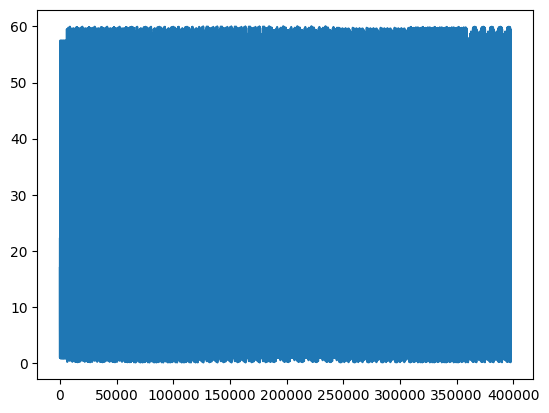

In [118]:
filtered_df2 = filtered_df.loc[:,['cpu_usage','duration']]
# filtered_df2.plot()
filtered_df['duration'].plot()
plt.show()